### Project Description: Predicting SME Business Sustainability

#### Overview:
This project aims to develop a predictive model to determine whether small and medium-sized enterprises (SMEs) will remain **active** or **fail**, leveraging historical and operational data about the business. By analyzing various financial, operational, and organizational factors, the project not only provides predictions but also offers actionable recommendations to improve the sustainability of businesses flagged as likely to fail.

The model focuses on providing value to business owners, investors, and policymakers by identifying potential risks and actionable areas to ensure long-term viability and growth.

---

#### Objectives:
1. **Prediction**: Use machine learning techniques to predict the business's status ("Active" or "Fail") based on provided historical and operational data.
2. **Recommendations**: Offer data-driven recommendations to help businesses flagged as likely to fail improve their operations, financial health, and customer retention strategies.

---

#### Dataset Description:
The dataset contains a comprehensive set of features describing various aspects of SME operations. Below is a detailed explanation of the features:

1. **Business ID**: A unique identifier for each business (excluded from predictive modeling).  
2. **Industry**: The sector the business operates in, such as retail, technology, or healthcare.  
3. **Date Established**: The year the business was founded, used to calculate **Years Active** for the business.  
4. **Number of Employees**: Total number of full-time and part-time employees working in the business.  
5. **Legal Structure**: The business's organizational type, e.g., sole proprietorship, partnership, corporation, etc.  
6. **Location**: Geographic region of the business, which can influence market conditions and customer behavior.  
7. **Tax ID**: An anonymized tax identifier for tracking business compliance (irrelevant for prediction and excluded from the model).  
8. **Average Profit Margin**: The percentage of revenue left as profit after expenses, a key indicator of financial health.  
9. **Ownership**: The type of ownership structure, such as single-owner, co-owned, or franchised.  
10. **Average Annual Revenue**: Total annual income generated by the business from its operations.  
11. **Average Annual Expenses**: Yearly costs incurred by the business for its operations, including fixed and variable expenses.  
12. **Average Profit/Loss**: The net financial gain or loss over a given period.  
13. **Average Gross Margin**: Revenue remaining after deducting the cost of goods sold, expressed as a percentage.  
14. **Net Worth**: The total value of the business's assets minus liabilities, reflecting financial stability.  
15. **Working Capital**: Funds available for day-to-day operations, calculated as current assets minus current liabilities.  
16. **Sales Channels**: The methods used for selling products/services, e.g., online, physical stores, or direct sales.  
17. **Average Marketing Budget**: Annual spending on marketing efforts to attract and retain customers.  
18. **Customer Acquisition Cost**: The average cost of acquiring a new customer, calculated by dividing marketing expenses by new customers gained.  
19. **Customer Retention Rate**: The percentage of customers retained over time, indicating brand loyalty and service quality.  
20. **Total Social Media Followers**: A measure of digital presence and brand engagement across social media platforms.  
21. **Advertising Spend**: Total annual expenditure on advertising campaigns.  
22. **Sales Conversion Rate**: The percentage of leads or prospects converted into actual sales.  
23. **Sales Growth Rate**: The percentage change in sales over time, reflecting business expansion or contraction.  
24. **Employee Turnover Rate**: The rate at which employees leave the business, indicating workplace satisfaction and stability.  
25. **Training and Development**: Spending on employee skill enhancement programs.  
26. **Payroll Expenses**: Total salary and benefits paid to employees.  
27. **Is Active**: The target variable indicating the business's current status (1 = Active, 0 = Fail).

---

#### Methodology:
1. **Data Cleaning and Preprocessing**:  
   - Handle missing values, normalize numerical features, and encode categorical data.  
   - Engineer additional features, such as **Years Active**, from the `Date Established` feature.  

2. **Modeling**:  
   - Explore various machine learning algorithms (e.g., Random Forest, SVM, Logistic Regression, KNN) to predict **"Is Active"**.  
   - Perform hyperparameter tuning for optimal performance.

3. **Evaluation**:  
   - Use metrics such as accuracy, F1-score, and ROC-AUC to assess model performance.  
   - Interpret feature importance to identify the most critical factors influencing business sustainability.

4. **Recommendation System**:  
   - For businesses predicted to fail, analyze key drivers (e.g., low profit margins, high expenses, poor retention rates) and provide tailored recommendations, such as reducing operational costs, investing in marketing, or improving employee retention.

---

#### Potential Impact:
- **Business Owners**: Gain insights into factors affecting their business and adopt targeted strategies to mitigate risks.  
- **Investors**: Identify high-risk ventures and allocate resources more effectively.  
- **Policy Makers**: Support SME growth by addressing systemic issues impacting business success.

This project emphasizes proactive intervention to support SMEs in achieving long-term sustainability, leveraging data as a critical resource for strategic decision-making.

## Data Cleaning and Preprocessing

1. Handle and encode categorical variables.

2. Drop irrelevant and redundant features

### Import necessary libraries

In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




### Load and inspect dataset

In [2]:
# Load the dataset
data = pd.read_csv('/content/sme_dataset_nigeria.csv')

# Check the first few rows
print(data.head())

# Check data types and missing values
print(data.info())
print(data.isnull().sum())


     Business ID     Industry Date Established  Number of Employees  \
0  BID-2014-2824       Retail       2021-03-04                    4   
1  BID-2014-9935  Agriculture       2015-02-24                    5   
2  BID-2014-9279      Fishery       2016-08-10                    7   
3  BID-2014-5557  Photography       2020-08-10                    2   
4  BID-2014-4527  Photography       2015-09-29                    2   

       Legal Structure       Location          Tax ID  Average Profit Margin  \
0          Corporation         Ibadan  TIN-2051802512               0.180402   
1          Corporation            Jos  TIN-1136505587               0.358152   
2  Sole Proprietorship          Enugu  TIN-7635473142               0.363389   
3  Sole Proprietorship  Port Harcourt  TIN-8293453178               0.302401   
4          Partnership          Abuja  TIN-5693307665               0.292460   

         Ownership  Average Annual Revenue  ...  Customer Acquisition Cost  \
0     Family-o

### Transform and Encode Non-Numeric Features

In [3]:
["Advertising Spend", "Average Annual Expenses", "Average Annual Revenue", "Average Gross Margin", "Average Marketing Budget", "Average Profit Margin", "Average Profit/Loss", "Customer Acquisition Cost", "Customer Retention Rate", "Employee Turnover Rate", "Net Worth", "Number of Employees", "Payroll Expenses", "Sales Conversion Rate", "Sales Growth Rate", "Total Social Media Followers", "Training and Development", "Working Capital", "Years Active", "Is Active"]

['Advertising Spend',
 'Average Annual Expenses',
 'Average Annual Revenue',
 'Average Gross Margin',
 'Average Marketing Budget',
 'Average Profit Margin',
 'Average Profit/Loss',
 'Customer Acquisition Cost',
 'Customer Retention Rate',
 'Employee Turnover Rate',
 'Net Worth',
 'Number of Employees',
 'Payroll Expenses',
 'Sales Conversion Rate',
 'Sales Growth Rate',
 'Total Social Media Followers',
 'Training and Development',
 'Working Capital',
 'Years Active',
 'Is Active']

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Date Established' to datetime
data['Date Established'] = pd.to_datetime(data['Date Established'], errors='coerce')

# Create a new column for 'Years Active'
data['Years Active'] = (pd.Timestamp.now() - data['Date Established']).dt.days / 365.25

# Remove irrelevant columns (e.g., identifiers and redundant information)
irrelevant_columns = [
    "Business ID",
    "Industry",
    "Date Established",
    "Tax ID",
    "Location",
    "Legal Structure",
    "Sales Channels",
    "Ownership"
    ]
data = data.drop(columns=irrelevant_columns)

# Check for and handle missing data
data = data.dropna()  # or fill missing values with appropriate methods

# # Encode categorical variables using LabelEncoder
# categorical_columns = data.select_dtypes(include=['object']).columns
# label_encoders = {}

# for col in categorical_columns:
#     encoder = LabelEncoder()
#     data[col] = encoder.fit_transform(data[col])
#     label_encoders[col] = encoder

# sort columns alphabetically
data = data[[
    "Advertising Spend",
    "Average Annual Expenses",
    "Average Annual Revenue",
    "Average Gross Margin",
    "Average Marketing Budget",
    "Average Profit Margin",
    "Average Profit/Loss",
    "Customer Acquisition Cost",
    "Customer Retention Rate",
    "Employee Turnover Rate",
    "Net Worth",
    "Number of Employees",
    "Payroll Expenses",
    "Sales Conversion Rate",
    "Sales Growth Rate",
    "Total Social Media Followers",
    "Training and Development",
    "Working Capital",
    "Years Active",
    "Is Active"
    ]]

# Check the cleaned dataset structure
print(data.info(), '\n')
print(data.head(), '\n')






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Advertising Spend             10000 non-null  float64
 1   Average Annual Expenses       10000 non-null  float64
 2   Average Annual Revenue        10000 non-null  float64
 3   Average Gross Margin          10000 non-null  float64
 4   Average Marketing Budget      10000 non-null  float64
 5   Average Profit Margin         10000 non-null  float64
 6   Average Profit/Loss           10000 non-null  float64
 7   Customer Acquisition Cost     10000 non-null  float64
 8   Customer Retention Rate       10000 non-null  float64
 9   Employee Turnover Rate        10000 non-null  float64
 10  Net Worth                     10000 non-null  float64
 11  Number of Employees           10000 non-null  int64  
 12  Payroll Expenses              10000 non-null  float64
 13  Sa

### Visualize the distribution of features using histogram

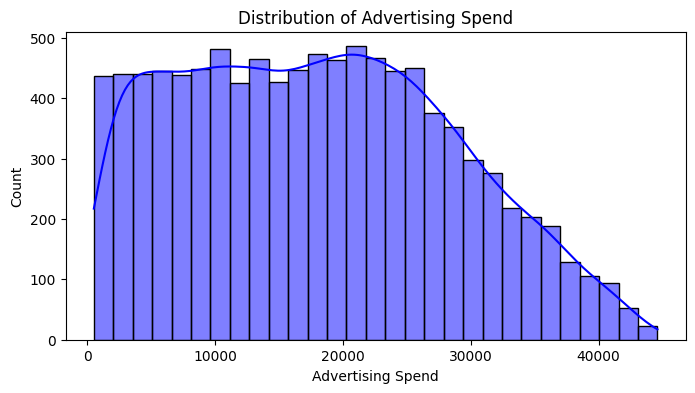

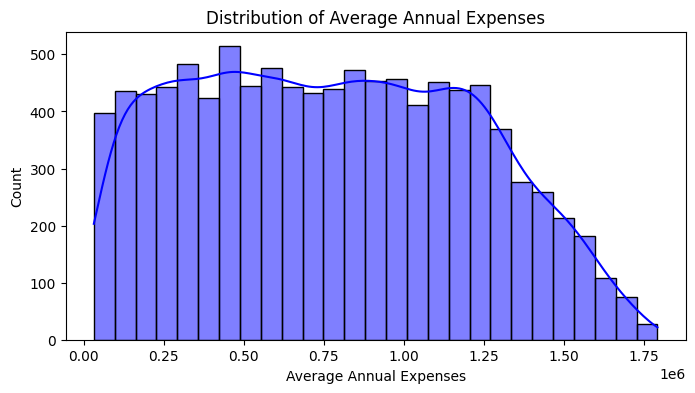

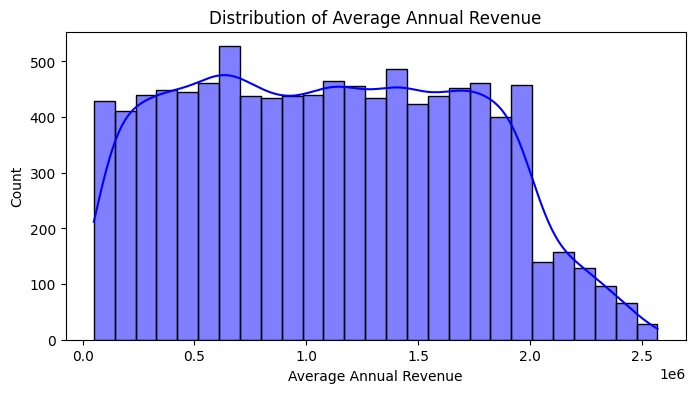

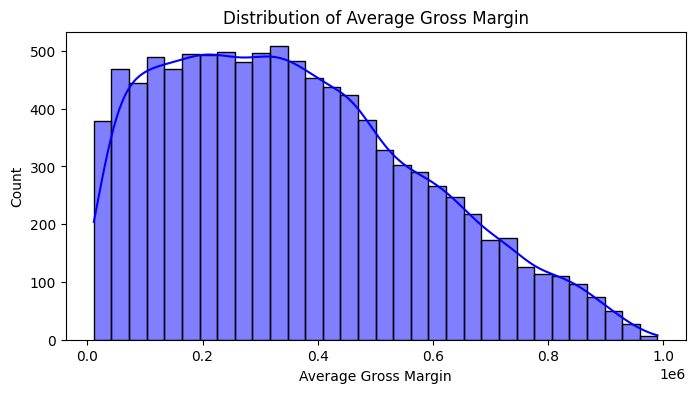

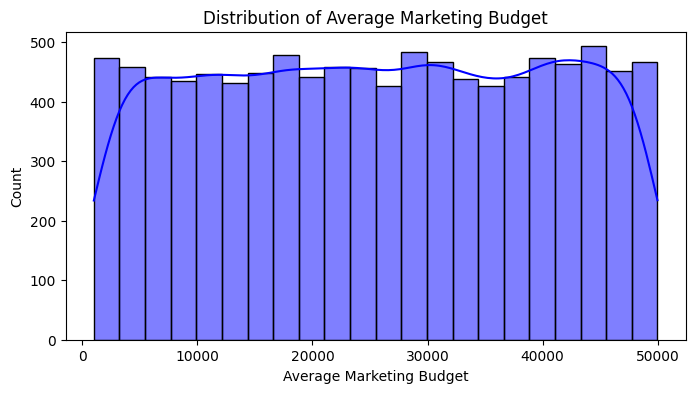

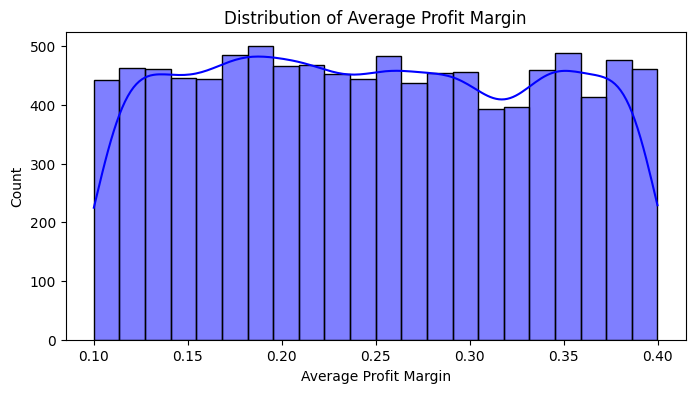

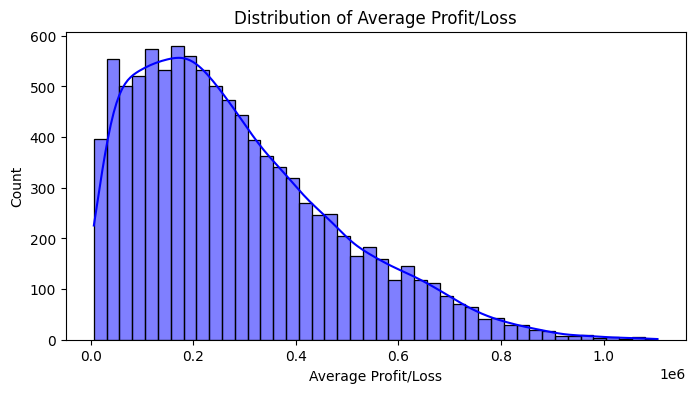

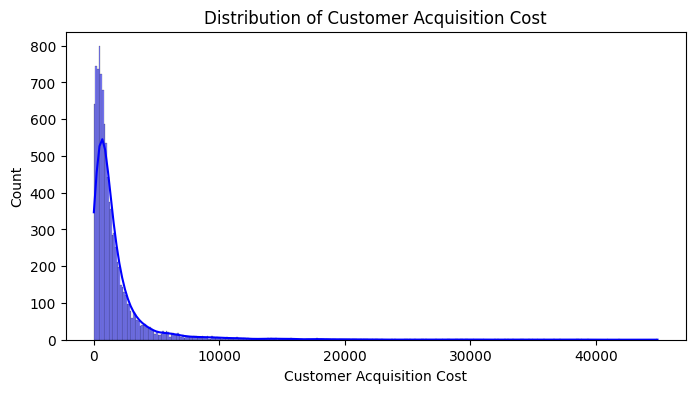

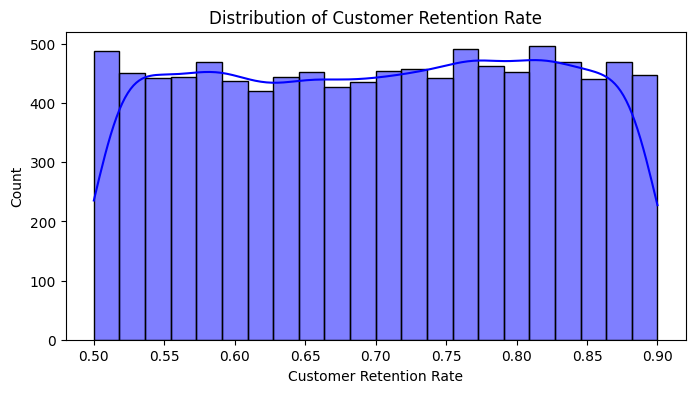

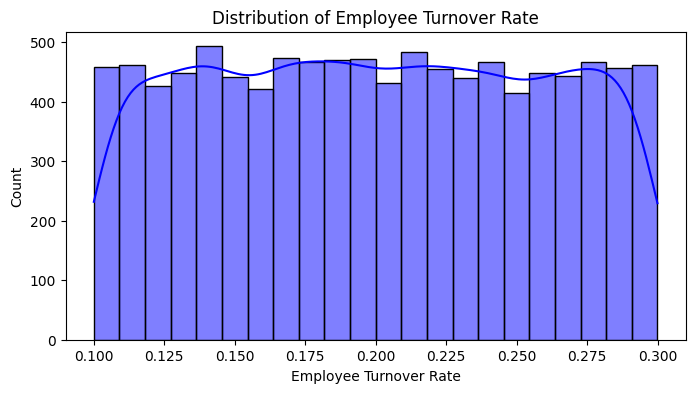

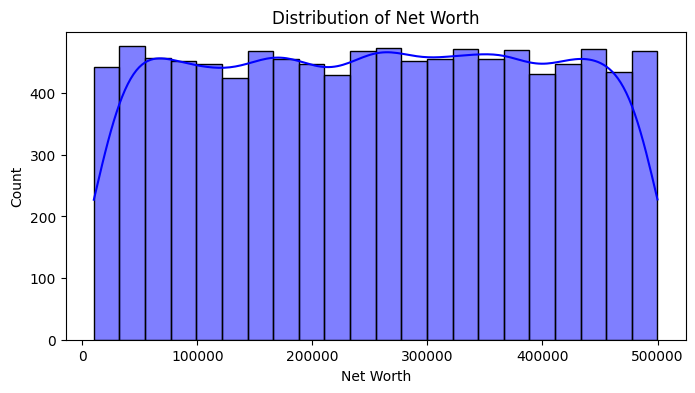

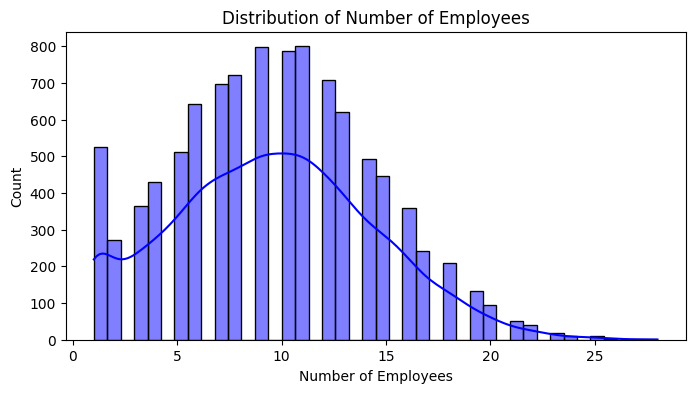

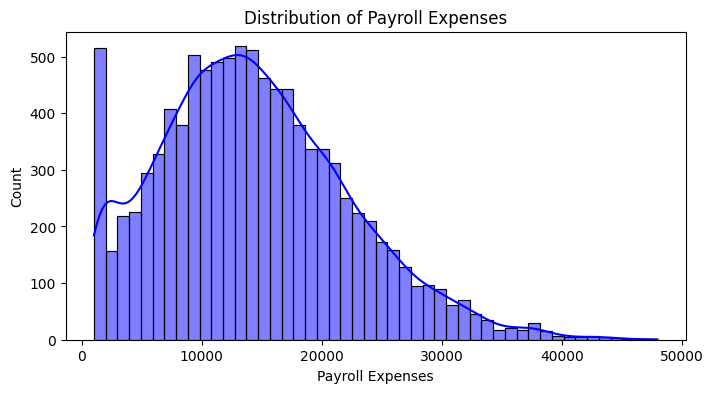

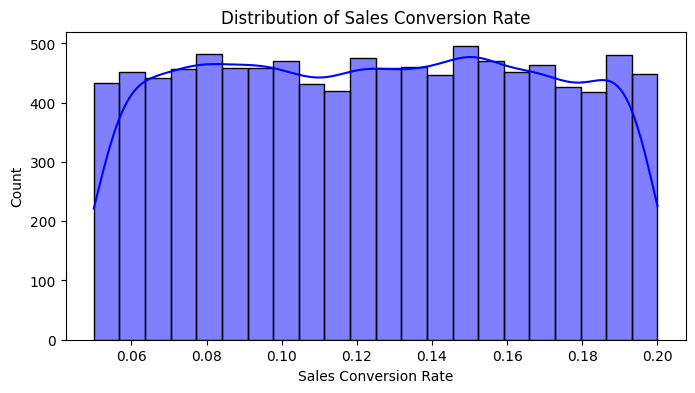

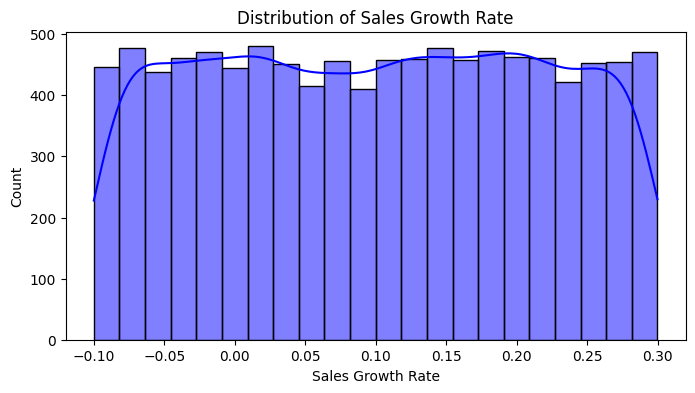

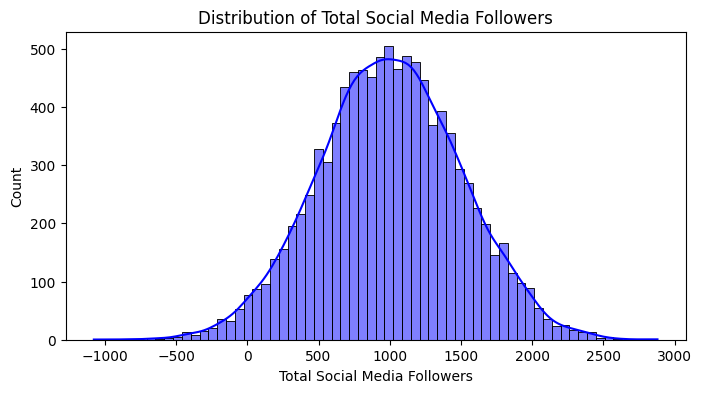

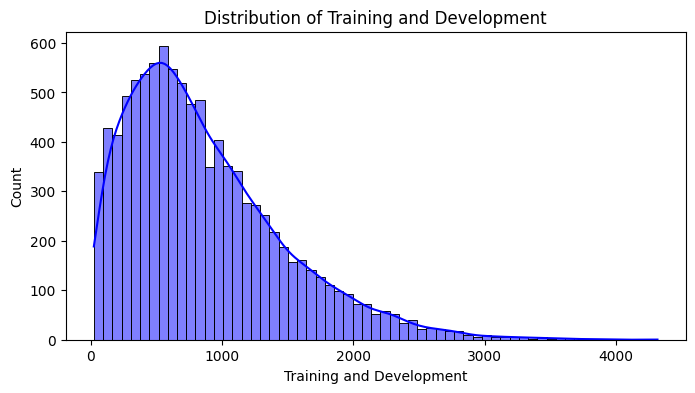

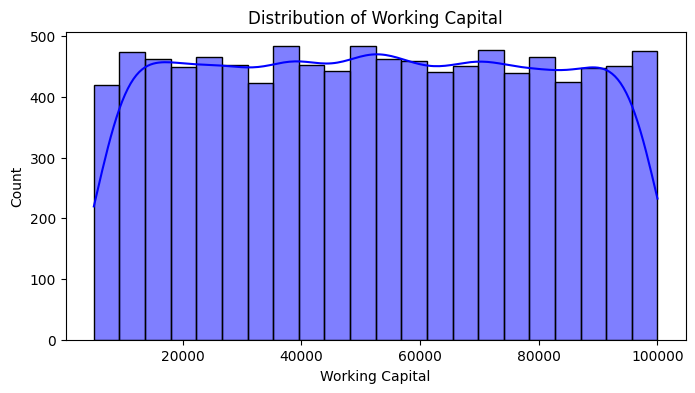

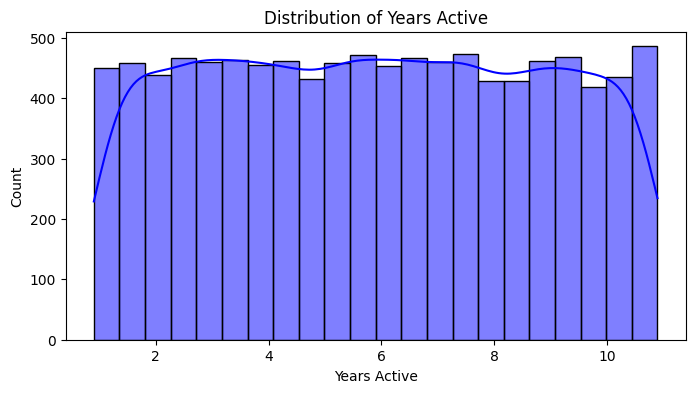

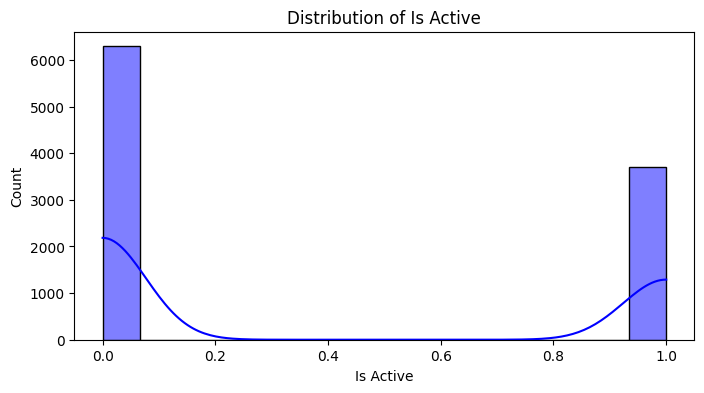

In [5]:
# Plot histograms for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()


### Dimensionality Reduction and Feature Selection

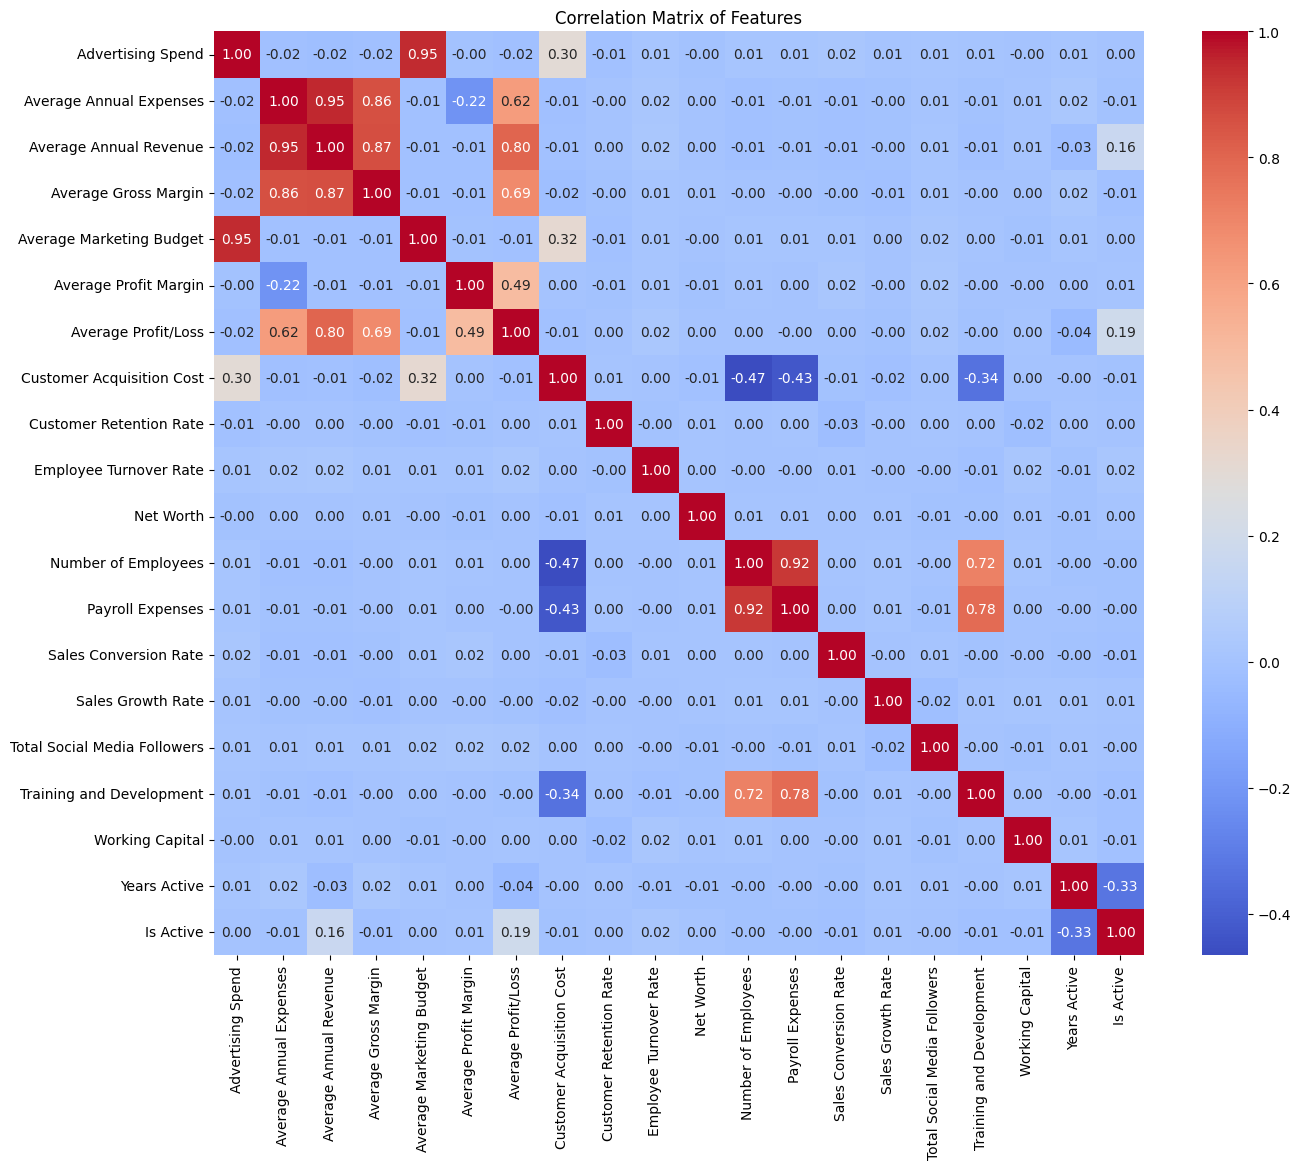

[('Advertising Spend', 'Average Marketing Budget'),
 ('Average Annual Expenses', 'Average Annual Revenue'),
 ('Average Annual Expenses', 'Average Gross Margin'),
 ('Average Annual Revenue', 'Average Annual Expenses'),
 ('Average Annual Revenue', 'Average Gross Margin'),
 ('Average Gross Margin', 'Average Annual Expenses'),
 ('Average Gross Margin', 'Average Annual Revenue'),
 ('Average Marketing Budget', 'Advertising Spend'),
 ('Number of Employees', 'Payroll Expenses'),
 ('Payroll Expenses', 'Number of Employees')]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap for visualization
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

# Identify highly correlated features (threshold > 0.85)
high_correlation = correlation_matrix.abs() > 0.85
high_corr_pairs = [
    (i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
    if high_correlation.loc[i, j] and i != j
]

high_corr_pairs


The correlation matrix reveals several highly correlated features (correlation > 0.85), which can introduce multicollinearity into the model.

### [OPTIONAL] Drop redundant colinear features

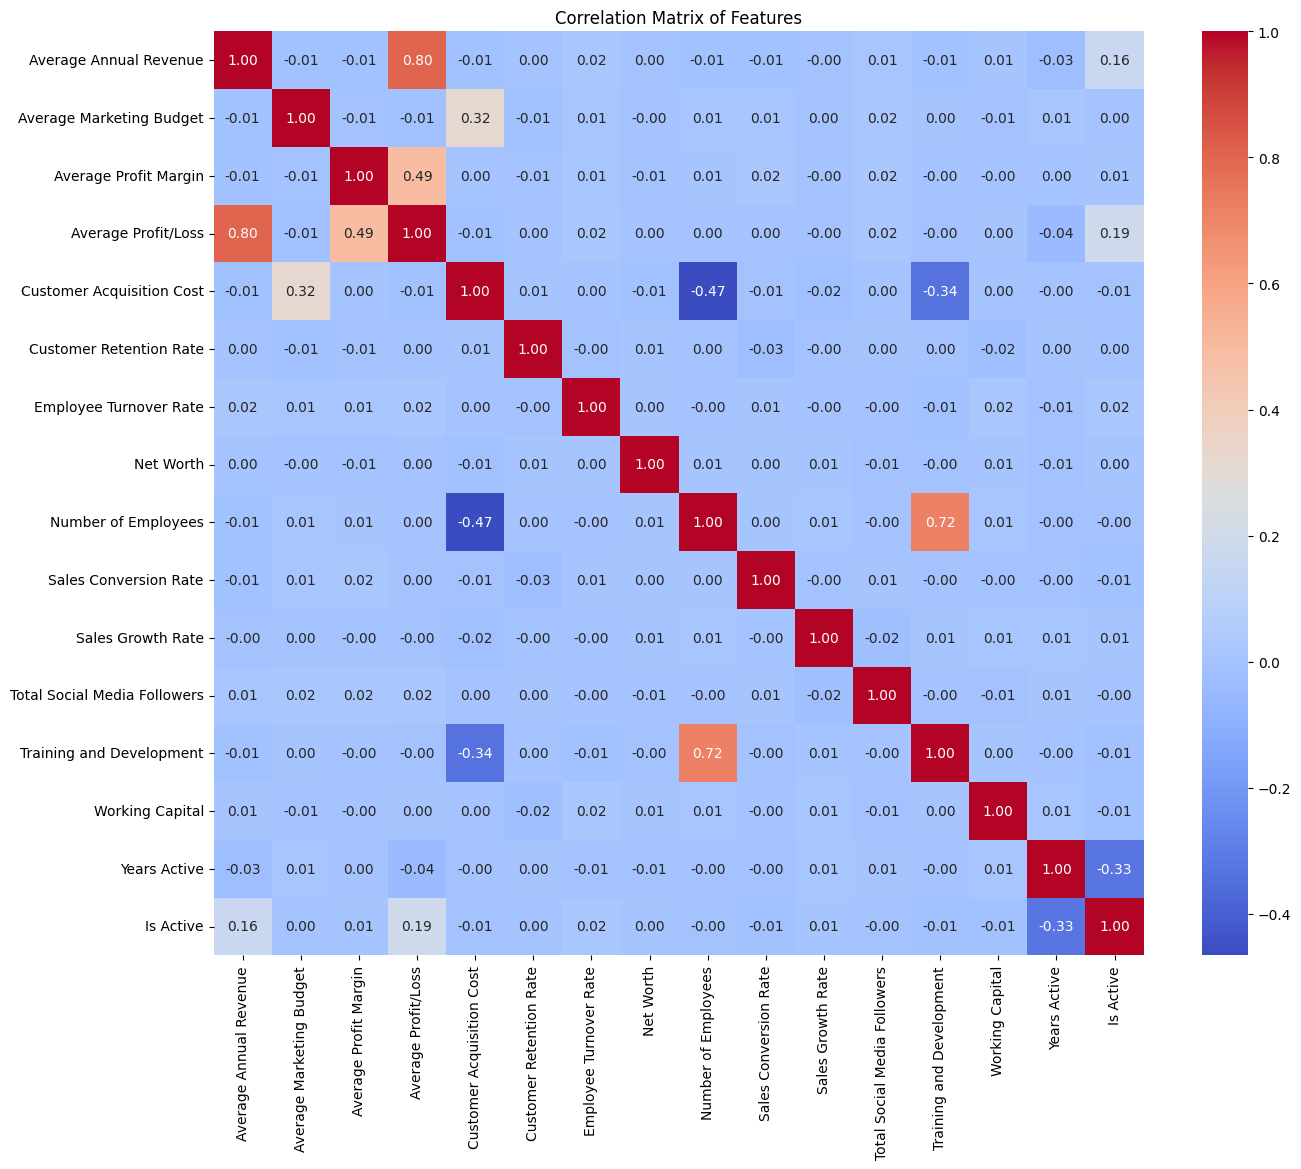

In [7]:
# Drop redundant features based on correlation analysis
redundant_features = [
    "Payroll Expenses",  # Highly correlated with 'Number of Employees'
    "Average Annual Expenses",  # Highly correlated with 'Average Annual Revenue'
    "Average Gross Margin",  # Highly correlated with 'Average Annual Revenue'
    "Advertising Spend",  # Highly correlated with 'Average Marketing Budget'
]
data = data.drop(columns=redundant_features)

# Check the updated dataset
# data_reduced.info(), data_reduced.head()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap for visualization
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

### Vizualize Feature Importance

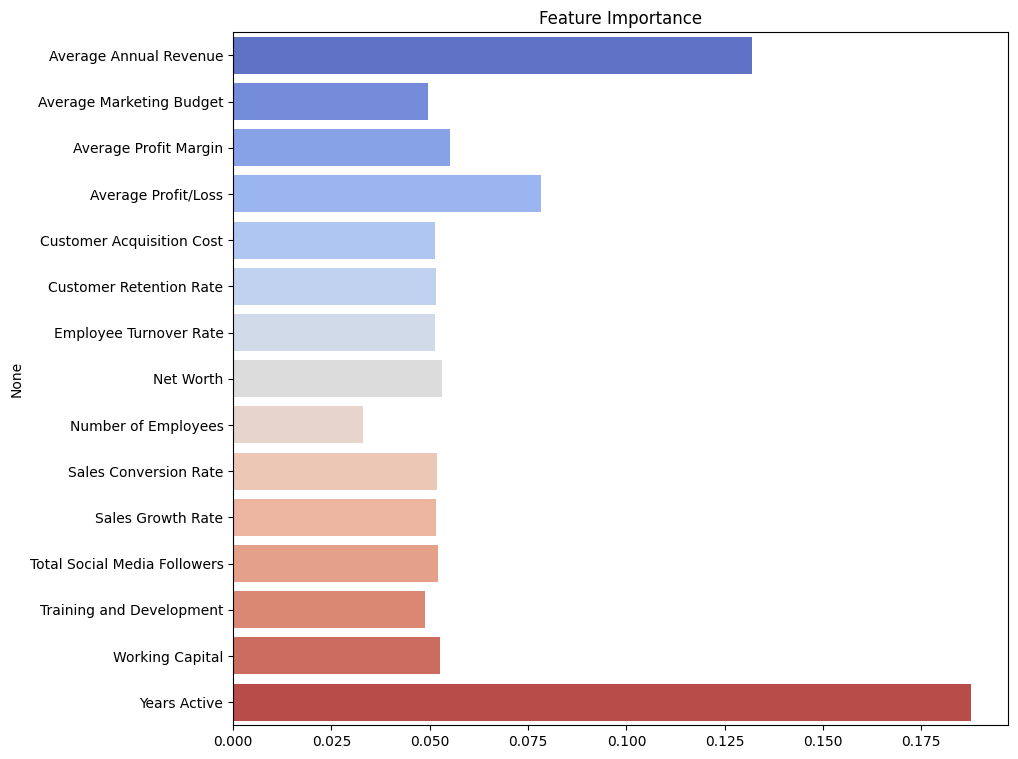

In [8]:
# Define features and target
X = data.drop(['Is Active'], axis=1)
y = data['Is Active']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Feature Importance
importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 9))
sns.barplot(x=importances, y=features, hue=features, palette='coolwarm', legend=False) # Corrected line
plt.title('Feature Importance')
plt.show()

## Modelling and Evaluation

Build Classification Models and Evaluate:

1. Random Forest
2. Logistic Regression
3. Support Vector Machine (SVM)
4. K Nearest Neighbor (KNN)

### Preparing the Data

* Define Features and Target
* Scale numeric features for consistency
* Split Data into Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


# Separate features and target variable
X = data.drop(columns=["Is Active"])
y = data["Is Active"]

# Identify numerical and categorical columns
# numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns
# categorical_cols = X.select_dtypes(include=["object"]).columns

# Scale numerical features
# scaler = StandardScaler()
# X_scaled = X.copy()
# X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Define functions to interpret model performace metrics and visualize confusion matrix

In [10]:
def interpret_model_results(accuracy, roc_auc, report):
    # Interpret accuracy
    print(f"Model Accuracy: {accuracy:.2%}")
    if accuracy > 0.85:
        print("The model has excellent overall accuracy.")
    elif accuracy > 0.75:
        print("The model has good accuracy, but there may be room for improvement.")
    else:
        print("The model's accuracy is moderate and may need improvement.")

    # Interpret ROC-AUC
    print(f"Model ROC-AUC Score: {roc_auc:.2f}")
    if roc_auc > 0.90:
        print("The model has outstanding discriminatory power.")
    elif roc_auc > 0.80:
        print("The model has strong discriminatory power.")
    elif roc_auc > 0.70:
        print("The model has acceptable discriminatory power.")
    else:
        print("The model has poor discriminatory power and needs improvement.")

    # Interpret classification report
    print("\nClassification Report Analysis:")
    lines = report.strip().split("\n")
    for line in lines:
        if line.strip() and line.split()[0].isdigit():  # Detect lines starting with class numbers
            metrics = line.split()
            if len(metrics) >= 5:  # Ensure the line has all metrics
                class_label = metrics[0]
                precision = float(metrics[1])
                recall = float(metrics[2])
                f1 = float(metrics[3])
                print(f" - Class {class_label}: Precision={precision:.2f}, Recall={recall:.2f}, F1-Score={f1:.2f}")
                if f1 > 0.85:
                    print(f"   Excellent performance for class {class_label}.")
                elif f1 > 0.75:
                    print(f"   Good performance for class {class_label}, but there may be room for improvement.")
                else:
                    print(f"   Performance for class {class_label} needs improvement.")


# Create a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()



### Model 01: Random Forest Classifier

0.73
0.7723630757759504
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1258
           1       0.66      0.56      0.61       742

    accuracy                           0.73      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.72      0.73      0.72      2000

Model Accuracy: 73.00%
The model's accuracy is moderate and may need improvement.
Model ROC-AUC Score: 0.77
The model has acceptable discriminatory power.

Classification Report Analysis:
 - Class 0: Precision=0.76, Recall=0.83, F1-Score=0.79
   Good performance for class 0, but there may be room for improvement.
 - Class 1: Precision=0.66, Recall=0.56, F1-Score=0.61
   Performance for class 1 needs improvement.


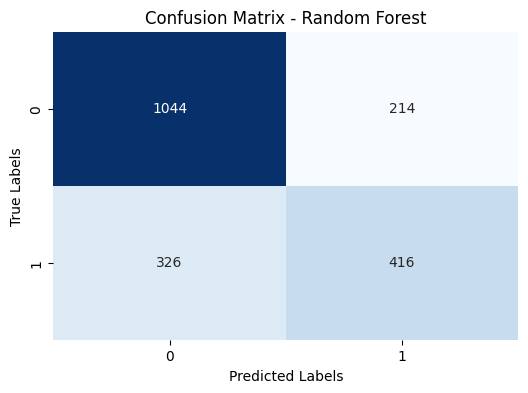

In [11]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf)
print(roc_auc_rf)
print(report_rf)

interpret_model_results(accuracy_rf, roc_auc_rf, report_rf)

# Generate and vizualize confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")



### 02. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6935
0.7312059959118783
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1258
           1       0.62      0.44      0.52       742

    accuracy                           0.69      2000
   macro avg       0.67      0.64      0.65      2000
weighted avg       0.68      0.69      0.68      2000

Model Accuracy: 69.35%
The model's accuracy is moderate and may need improvement.
Model ROC-AUC Score: 0.73
The model has acceptable discriminatory power.

Classification Report Analysis:
 - Class 0: Precision=0.72, Recall=0.84, F1-Score=0.78
   Good performance for class 0, but there may be room for improvement.
 - Class 1: Precision=0.62, Recall=0.44, F1-Score=0.52
   Performance for class 1 needs improvement.


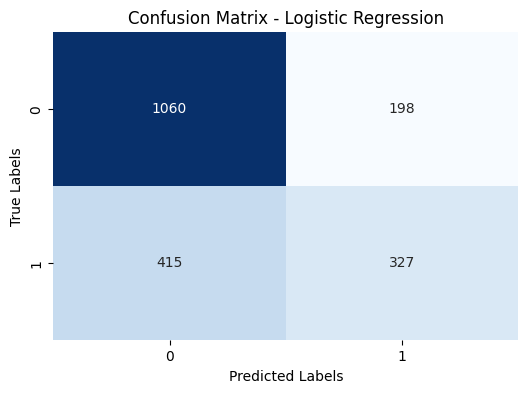

In [12]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg_model.predict(X_test)
y_pred_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(accuracy_lr)
print(roc_auc_lr)
print(report_lr)

interpret_model_results(accuracy_lr, roc_auc_lr, report_lr)


# Generate and vizualize confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression")

### 03. Support Vector Machine (SVM)

0.688
0.6056981946271625
              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1258
           1       0.94      0.17      0.29       742

    accuracy                           0.69      2000
   macro avg       0.81      0.58      0.54      2000
weighted avg       0.77      0.69      0.61      2000

Model Accuracy: 68.80%
The model's accuracy is moderate and may need improvement.
Model ROC-AUC Score: 0.61
The model has poor discriminatory power and needs improvement.

Classification Report Analysis:
 - Class 0: Precision=0.67, Recall=0.99, F1-Score=0.80
   Good performance for class 0, but there may be room for improvement.
 - Class 1: Precision=0.94, Recall=0.17, F1-Score=0.29
   Performance for class 1 needs improvement.


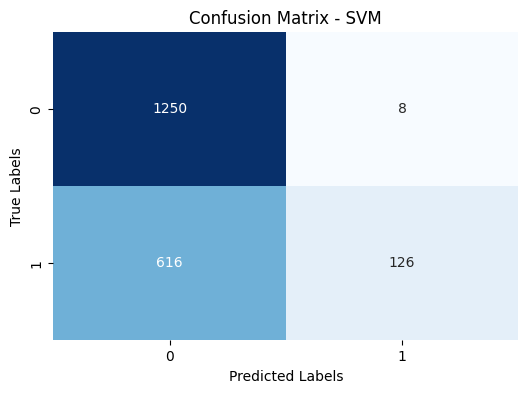

In [13]:
from sklearn.svm import SVC

# Train a Support Vector Machine model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(accuracy_svm)
print(roc_auc_svm)
print(report_svm)

interpret_model_results(accuracy_svm, roc_auc_svm, report_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM")


### 04. K Nearest Neighbor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best number of neighbors: {'n_neighbors': 20}
0.6845
0.5991664131231279
              precision    recall  f1-score   support

           0       0.68      0.96      0.79      1258
           1       0.77      0.22      0.34       742

    accuracy                           0.68      2000
   macro avg       0.72      0.59      0.56      2000
weighted avg       0.71      0.68      0.62      2000

Model Accuracy: 68.45%
The model's accuracy is moderate and may need improvement.
Model ROC-AUC Score: 0.60
The model has poor discriminatory power and needs improvement.

Classification Report Analysis:
 - Class 0: Precision=0.68, Recall=0.96, F1-Score=0.79
   Good performance for class 0, but there may be room for improvement.
 - Class 1: Precision=0.77, Recall=0.22, F1-Score=0.34
   Performance for class 1 needs improvement.


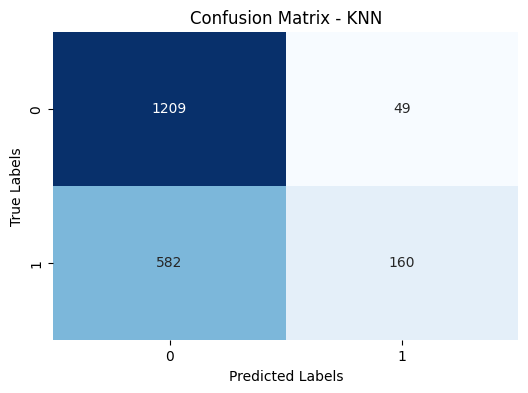

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define the parameter grid for the number of neighbors
param_grid = {"n_neighbors": range(1, 21)}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and the corresponding model
best_knn_model = grid_search.best_estimator_
print(f"Best number of neighbors: {grid_search.best_params_}")

# Make predictions with the tuned model
y_pred_knn = best_knn_model.predict(X_test)
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Print results
print(accuracy_knn)
print(roc_auc_knn)
print(report_knn)

interpret_model_results(accuracy_knn, roc_auc_knn, report_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, "KNN")


### Logistic Regression has the best Performance

## Recommendation System

### Define a function that:
1. takes feature information about a business
2. predict if the business will Fail or Remain Active
3. generate suggestions based on predicted active status and features

In [31]:
def generate_suggestions(features):
    """
    Generate sustainability suggestions for businesses based on prediction and feature values.

    :param features: Dictionary of feature values for a business.
    :param prediction: Prediction result (0 = Fail, 1 = Active).
    :return: List of suggestions for the business.
    """

    # cast features dict to dataframe
    df_features = pd.DataFrame(features, index=pd.Index(range(0,1)))
    df_features = df_features.drop(['Advertising Spend', 'Average Annual Expenses', 'Average Gross Margin', 'Payroll Expenses'], axis=1)






    # print(df_features)
    # make predictions using logistic regression model
    prediction = log_reg_model.predict(df_features)[0]
    prediction_proba = log_reg_model.predict_proba(df_features)[:, 1][0]

    # prediction = svm_model.predict(df_features)[0]
    # prediction_proba = svm_model.predict_proba(df_features)[:, 1][0]

    print("Prediction:", prediction, "Probability:", prediction_proba)


    suggestions = []

    if prediction == 0:  # Predicted to fail
        suggestions.extend(["Your business is at risk of becoming inactive. Consider the following:"])

        # Financial health
        if features['Average Profit Margin'] < 10:
            suggestions.append("- Improve profit margin by reducing costs or optimizing pricing strategies.")
        if features['Average Annual Expenses'] > features['Average Annual Revenue'] * 0.8:
            suggestions.append("- Reduce annual expenses or diversify revenue streams to stabilize cash flow.")
        if features['Net Worth'] <= 0:
            suggestions.append("- Work on reducing liabilities to improve financial standing.")
        if features['Working Capital'] <= 0:
            suggestions.append("- Secure additional funding or optimize cash management to stabilize operations.")

        # Operational improvements
        if features['Payroll Expenses'] > features['Average Annual Revenue'] * 0.3:
            suggestions.append("- Optimize payroll expenses by evaluating staffing and productivity levels.")
        if features['Employee Turnover Rate'] > 20:
            suggestions.append("- Improve employee satisfaction to reduce turnover and enhance productivity.")
        if features['Training and Development'] < 5:
            suggestions.append("- Invest in training programs to improve workforce skills and efficiency.")

        # Sales and marketing
        if features['Sales Conversion Rate'] < 10:
            suggestions.append("- Optimize sales processes to convert more leads into customers.")
        if features['Sales Growth Rate'] < 5:
            suggestions.append("- Explore new sales strategies to accelerate growth.")
        if features['Total Social Media Followers'] < 500:
            suggestions.append("- Strengthen your social media presence to boost brand visibility.")
        if features['Advertising Spend'] < features['Average Marketing Budget'] * 0.5:
            suggestions.append("- Allocate more budget to advertising campaigns to attract new customers.")
        if features['Customer Retention Rate'] < 50:
            suggestions.append("- Focus on retention strategies, such as loyalty programs or enhanced customer service.")

    elif prediction == 1:  # Predicted to remain active
        suggestions.extend(["Your business is performing well. Here are some suggestions to ensure sustainability:"])

        # Financial growth
        if features['Average Profit Margin'] < 15:
            suggestions.append("- Aim to increase profit margins through cost optimization and strategic pricing.")
        if features['Sales Growth Rate'] < 10:
            suggestions.append("- Explore innovative sales approaches to achieve consistent growth.")
        if features['Net Worth'] > 0 and features['Working Capital'] > 0:
            suggestions.append("- Consider reinvesting profits into growth opportunities or reserve funds.")

        # Operational efficiency
        if features['Employee Turnover Rate'] < 10:
            suggestions.append("- Maintain strong employee engagement programs to keep turnover low.")
        if features['Training and Development'] < 10:
            suggestions.append("- Continue investing in workforce training to stay competitive.")

        # Sales and customer success
        if features['Sales Conversion Rate'] < 15:
            suggestions.append("- Refine sales funnel strategies to maximize conversions.")
        if features['Customer Retention Rate'] < 80:
            suggestions.append("- Enhance customer satisfaction initiatives to improve retention.")

        # Marketing and digital presence
        if features['Total Social Media Followers'] > 500:
            suggestions.append("- Leverage your social media following with targeted campaigns to boost engagement.")

    suggestions.append('\n')
    return suggestions


# Test Example
business_features = {
    "Advertising Spend": 50000,
    "Average Annual Expenses": 1500000,
    "Average Annual Revenue": 2000000,
    "Average Gross Margin": 40,
    "Average Marketing Budget": 100000,
    "Average Profit Margin": 20,
    "Average Profit/Loss": 500000,
    "Customer Acquisition Cost": 150,
    "Customer Retention Rate": 85,
    "Employee Turnover Rate": 8,
    "Net Worth": 500000,
    "Number of Employees": 150,
    "Payroll Expenses": 800000,
    "Sales Conversion Rate": 25,
    "Sales Growth Rate": 15,
    "Total Social Media Followers": 10000,
    "Training and Development": 12,
    "Working Capital": 200000,
    "Years Active": 10,
}

# Prediction Example (0 = Fail, 1 = Active)
# prediction = 0  # Predicted to fail
recommendations = generate_suggestions(business_features)
print("\n".join(recommendations))


Prediction: 1 Probability: 0.624170783376611
Your business is performing well. Here are some suggestions to ensure sustainability:
- Consider reinvesting profits into growth opportunities or reserve funds.
- Maintain strong employee engagement programs to keep turnover low.
- Leverage your social media following with targeted campaigns to boost engagement.




### Load sample business features information and make Recommendations

In [33]:
from nigerian_sme import ng_sme
for name, item in ng_sme.items():
    print(name)
    recommendations = generate_suggestions(item)
    print("\n".join(recommendations))

Abuja Designs
Prediction: 0 Probability: 0.4173593286160354
Your business is at risk of becoming inactive. Consider the following:
- Improve profit margin by reducing costs or optimizing pricing strategies.
- Reduce annual expenses or diversify revenue streams to stabilize cash flow.
- Work on reducing liabilities to improve financial standing.
- Secure additional funding or optimize cash management to stabilize operations.
- Optimize payroll expenses by evaluating staffing and productivity levels.
- Improve employee satisfaction to reduce turnover and enhance productivity.
- Invest in training programs to improve workforce skills and efficiency.
- Optimize sales processes to convert more leads into customers.
- Explore new sales strategies to accelerate growth.
- Strengthen your social media presence to boost brand visibility.
- Allocate more budget to advertising campaigns to attract new customers.
- Focus on retention strategies, such as loyalty programs or enhanced customer service

## Conclusion

The model predicts if a business will fail or remain active and then provides recommendations for sustainability and upscaling...